In [1]:
!pip install scikit-learn

In [26]:
import numpy as np
import pandas as pd
df=pd.read_csv("data (4).csv")
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [28]:
df.shape
cols=df.columns
print(cols)
df.value_counts('diagnosis')

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


diagnosis
B    357
M    212
dtype: int64

In [29]:
#data preprocessing
#step2.seperating dependent and independent variables
y=df['diagnosis']
df.drop('diagnosis',axis=1,inplace=True) #dependent variables
#step3: removing unimportant features, features with most values are null
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
cols=df.columns
print(cols)

x=df ##independ variables


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [31]:
#step4:splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
#step5:feature scaling(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.23044157 0.32157676 0.21940433 ... 0.31484671 0.30277942 0.09858323]
 [0.20062473 0.42116183 0.19452699 ... 0.06965208 0.34042973 0.06677161]
 [0.62232003 0.76929461 0.60403566 ... 0.56079917 0.19850187 0.07431457]
 ...
 [0.11619102 0.35726141 0.11077327 ... 0.17402687 0.17524147 0.17263545]
 [0.12963226 0.35311203 0.11706171 ... 0.         0.06780997 0.06919848]
 [0.21434995 0.59004149 0.21235575 ... 0.33251808 0.10782574 0.21172767]]


In [33]:
#step-6:fitting knn classifier to the training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
#step 7:predict the test results
y_pred=classifier.predict(x_test)
print(y_pred)

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M']


In [38]:
#step8:create confusion matrix to see accuracy

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
print(cm)

[[79 11]
 [ 0 53]]


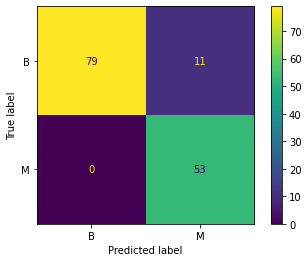

In [39]:
#confudion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [41]:
#classifier accuracy
training_score=classifier.score(x_train,y_train)
test_score=classifier.score(x_test,y_test)
print(training_score)
print(test_score)

0.9765258215962441
0.9230769230769231


In [42]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 22):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [43]:
#evaluation of model
##Evaluating the model
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9765258215962441, 0.9230769230769231]
3 : [0.9812206572769953, 0.8951048951048951]
4 : [0.9835680751173709, 0.916083916083916]
5 : [0.9765258215962441, 0.9230769230769231]
6 : [0.9788732394366197, 0.9090909090909091]
7 : [0.9788732394366197, 0.916083916083916]
8 : [0.9812206572769953, 0.951048951048951]
9 : [0.9765258215962441, 0.9230769230769231]
10 : [0.9741784037558685, 0.9370629370629371]
11 : [0.9765258215962441, 0.9230769230769231]
12 : [0.9694835680751174, 0.9300699300699301]
13 : [0.9741784037558685, 0.9300699300699301]
14 : [0.9694835680751174, 0.9370629370629371]
15 : [0.9694835680751174, 0.9370629370629371]
16 : [0.9647887323943662, 0.9440559440559441]
17 : [0.9694835680751174, 0.9370629370629371]
18 : [0.9671361502347418, 0.9440559440559441]
19 : [0.971830985915493, 0.9440559440559441]
20 : [0.9624413145539906, 0.9440559440559441]
21 : [0.9647887323943662, 0.9440559440559441]


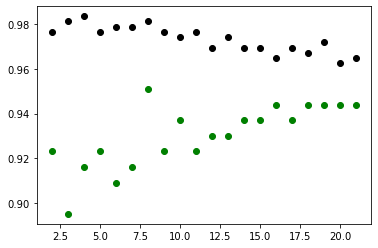

In [44]:
#visualization
import matplotlib.pyplot as plt
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
